In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='/Users/mick/Desktop/IRL-captions/data'
dataType='train2014'

In [3]:
# initialize COCO api for instance annotations
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
coco=COCO(annFile)

loading annotations into memory...
Done (t=13.91s)
creating index...
index created!


In [4]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=1.54s)
creating index...
index created!


In [5]:
image_directory = '{}/images/{}'.format(dataDir,dataType)

In [19]:
def annotations_by_image(coco, coco_caps):
    all_image_ids = coco.getImgIds()
    all_images = coco.loadImgs(all_image_ids)
    annotations_id_by_image = [coco_caps.getAnnIds(image_id) for image_id in all_image_ids]
    annotations_by_image = [coco_caps.loadAnns(ann_ids) for ann_ids in annotations_id_by_image]
    return annotations_by_image, all_images

def show_image_from_meta_data(image_directory, img_meta_data):    
    image_matrix = load_image(image_directory, img_meta_data)
    show_image(image_matrix)
     
def load_image(image_directory, img_meta_data):
    return io.imread("{}/{}".format(image_directory, img_meta_data['file_name']))
    
def show_image(image_matrix):
    plt.imshow(image_matrix); plt.axis('off'); plt.show()
    

In [20]:
"""
    The 2014 release contains 82,783 training, 40,504 validation, and 40,775 testing images.
    https://arxiv.org/pdf/1405.0312.pdf
"""
all_annotations, all_images_meta_data = annotations_by_image(coco, coco_caps)
print("{} total images: {}\n".format(dataType.capitalize(), len(all_annotations)))
assert len(all_annotations) == len(all_images_meta_data)


Train2014 total images: 82783



Sample data:


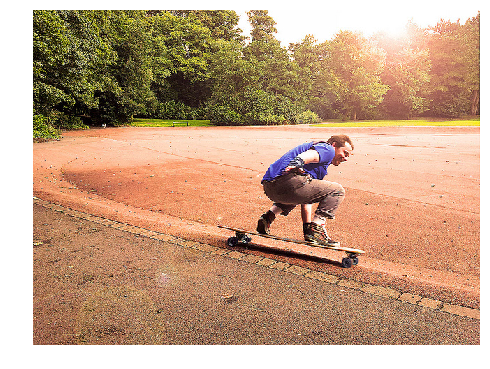

([{u'caption': u'A man is squatting on his skateboard as he speeds down the road. ',
   u'id': 95931,
   u'image_id': 223682},
  {u'caption': u'A man skateboarding down a red road in the sunlight.',
   u'id': 96153,
   u'image_id': 223682},
  {u'caption': u'A man riding a skateboard down a curvy street.',
   u'id': 97731,
   u'image_id': 223682},
  {u'caption': u'A person standing on a long board turing a corner.',
   u'id': 103548,
   u'image_id': 223682},
  {u'caption': u'A skateboarder is riding his skateboard in the street ',
   u'id': 121764,
   u'image_id': 223682}],
 {u'coco_url': u'http://images.cocodataset.org/train2014/COCO_train2014_000000223682.jpg',
  u'date_captured': u'2013-11-20 00:07:00',
  u'file_name': u'COCO_train2014_000000223682.jpg',
  u'flickr_url': u'http://farm4.staticflickr.com/3786/9732105170_6697f16464_z.jpg',
  u'height': 480,
  u'id': 223682,
  u'license': 5,
  u'width': 640})

In [21]:
random_img = np.random.randint(0,len(all_annotations))
print("Sample data:")
show_image_from_meta_data(image_directory, all_images_meta_data[random_img])
all_annotations[random_img], all_images_meta_data[random_img]